In [1]:
from torchvision.models import detection
import numpy as np
import torch
import cv2
import pickle
from matplotlib import pyplot as plt

In [2]:
def show_image(image, image_name):
    plt.imshow(image)
    plt.title(str(image_name))
    plt.show()

In [15]:
image_path = "images/image2.jpg"
model_choice = "frcnn-resnet" #frcnn-resnet, frcnn-mobilenet, retinanet
confidence = 0.5


In [16]:
labels = open("COCO_classes.txt", "r")
labels = labels.read().split('\n')

In [17]:
DEVICE = torch.device("cude" if torch.cuda.is_available() else "cpu")
print(f"[INFO] device - {DEVICE}")

[INFO] device - cpu


In [18]:
CLASSES = labels
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [19]:
'''
    initialize a dictionary containing model name and its torchvision
    function call
'''
MODELS = {
    "frcnn-resnet":detection.fasterrcnn_resnet50_fpn,
    "frcnn-mobilenet":detection.fasterrcnn_mobilenet_v3_large_320_fpn,
    "retinanet":detection.retinanet_resnet50_fpn
}

In [20]:
# load the model and set it to evaluation mode
model = MODELS[model_choice](pretrained=True, progress=True,
                            num_classes=len(CLASSES), pretrained_backbone=True).to(DEVICE)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [21]:
image = cv2.imread(image_path)
orig = image.copy()

In [22]:
# convert the image from BGR to RGB channel ordering and change the
# image from channels last to channels first ordering
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.transpose((2, 0, 1))

In [23]:
# add the batch dimensions, scale the raw pixels intensities to the
# range [0, 1] and convert the image to a floating point tensor
image = np.expand_dims(image, axis=0)
image = image /255.0
image = torch.FloatTensor(image)

In [24]:
# senf the input to the device and pass it throught the network to
# get the detection and predictions
image = image.to(DEVICE)
detections = model(image)[0]

person : 99.85393524169922
person : 99.8183822631836
person : 99.81317901611328
car : 99.715576171875
person : 99.67675018310547
person : 99.47356414794922
car : 99.30718231201172
person : 99.2707290649414
person : 98.95988464355469
person : 98.70413208007812
person : 98.44486999511719
person : 98.1236801147461
person : 97.79952239990234
person : 97.79620361328125
person : 96.4879150390625
backpack : 95.92046356201172
person : 95.23046875
person : 94.97171020507812
person : 94.92036437988281
person : 94.67951965332031
person : 94.65644836425781
car : 94.48289489746094
person : 93.64122772216797
handbag : 93.24264526367188
handbag : 93.20914459228516
fire hydrant : 92.74108123779297
person : 92.69258880615234
handbag : 92.05520629882812
person : 90.98928833007812
backpack : 90.85047912597656
car : 89.96412658691406
person : 88.2590103149414
person : 86.86343383789062
car : 86.07810974121094
car : 85.888916015625
person : 83.01264953613281
car : 81.6417007446289
backpack : 80.56734466552

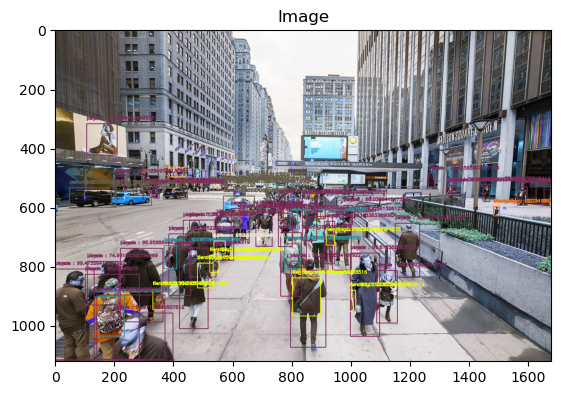

In [26]:
# loop over the detections
for i in range(0, len(detections["boxes"])):
    
    # extract the confidence associated with each prediction
    det_confidence = detections["scores"][i]
    # if confidence is greater than the threshold confidence.
    if det_confidence > confidence:
        # extract the index of the class label from the detections.
        # then compute the (x, y) coordinates of the bounding box
        idx = int(detections["labels"][i])
        box = detections["boxes"][i].detach().cpu().numpy()
        (startX, startY, endX, endY) = box.astype("int")
        
        # display the prediction to our terminal
        label = f"{CLASSES[idx-1]} : {det_confidence * 100}"
        print(label)
        
        # draw bounding box and label on the image
        cv2.rectangle(orig, (startX, startY), (endX, endY), COLORS[idx], 2)
        y = startY - 15 if startY -15 > 15 else startY + 15
        cv2.putText(orig, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX,
                   0.5, COLORS[idx], 2)


show_image(orig, "Image")    
        